In [ ]:
!pip install cohere


With Prompting


******* Evaluation Summary: Cohere *******
Model Name: Cohere

******* Category: Logical *******

Teaser: A man is found hanging from a ceiling with water on the floor. What happened?
Model Answer: The man did not commit suicide by hanging, but rather he stood on a block of ice to tie the rope, and the ice melted.
Expected Answer: He stood on an ice block, which melted.
Result: Correct
Time Taken: 0.96 seconds

Teaser: A man pushes his car to a hotel and tells the owner he's bankrupt. Why?
Model Answer: The man was playing Monopoly.
Expected Answer: Because he’s playing Monopoly.
Result: Correct
Time Taken: 0.88 seconds

Teaser: You see a boat filled with people. It has not sunk, but when you look again, you don’t see a single person. Why?
Model Answer: The boat is a submarine.
Expected Answer: All the people were married.
Result: Correct
Time Taken: 0.93 seconds

Teaser: A man dies of old age on his 25th birthday. How is this possible?
Model Answer: The man was a leap year baby, born

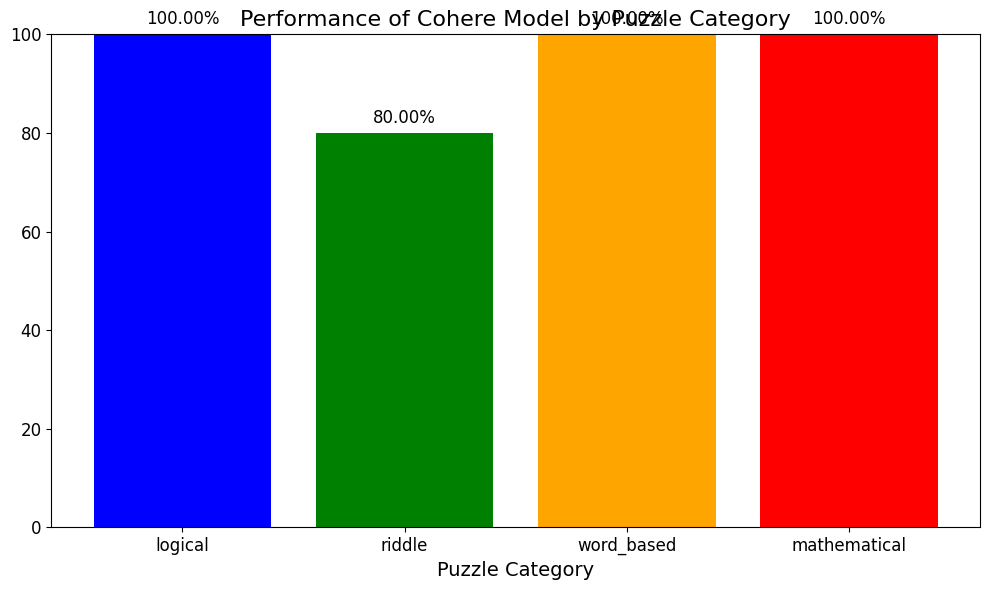

<Figure size 640x480 with 0 Axes>

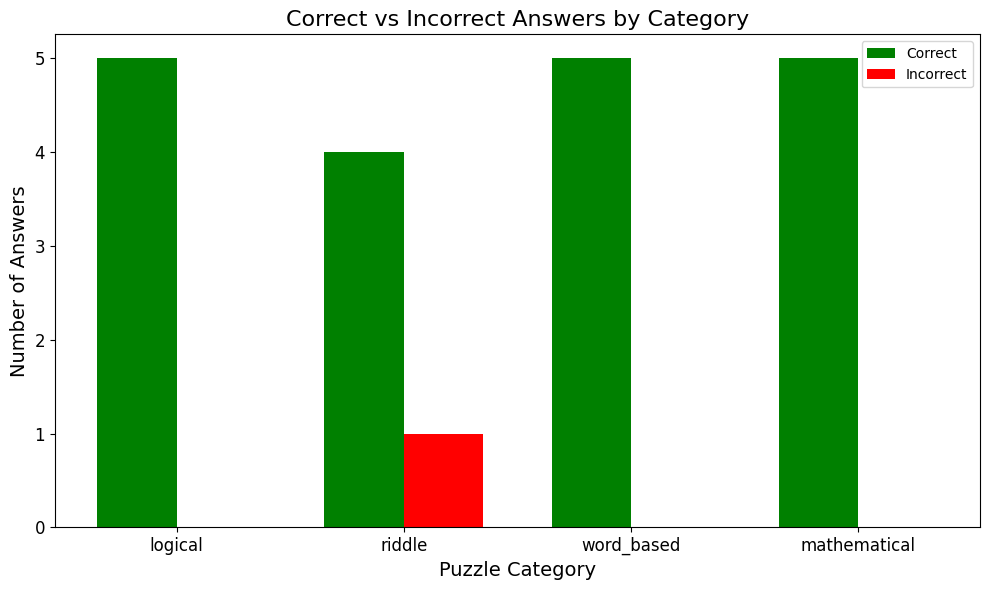

In [5]:
import time
import re
import cohere
import matplotlib.pyplot as plt


# Initialize Cohere client with your API key
API_KEY = "IPTHR0LKXbejJJJZ6uF9jfS3EM9QOlWgz5x5bwQt"  # Replace with your actual API key
co = cohere.Client(API_KEY)

# Example few-shot prompt for each category
few_shot_prompts = {
    "logical": """
    Example 1:
    Teaser: A man is found dead in a room. The only things inside are a puddle of water, a pencil, and a note that reads 'It’s over.' What happened?
    Answer: The man committed suicide by drowning. He used the pencil to write the note but was too weak to leave the room.
    Now solve this one:
    """,
    "riddle": """
    Example 1:
    Teaser: What word is spelled incorrectly in every dictionary?
    Answer: Incorrectly.
    Now solve this one:
    """,
    "word_based": """
    Example 1:
    Teaser: Find the odd one out among the following shapes: circle, square, triangle, rectangle.
    Answer: Circle.
    Now solve this one:
    """,
    "mathematical": """
    Example 1:
    Teaser: If five cats can catch five mice in five minutes, how many cats are needed to catch 100 mice in 100 minutes?
    Answer: Five.
    Now solve this one:
    """
}

brain_teasers = {
    "logical": {
        "A man is found hanging from a ceiling with water on the floor. What happened?": "He stood on an ice block, which melted.",
        "A man pushes his car to a hotel and tells the owner he's bankrupt. Why?": "Because he’s playing Monopoly.",
        "You see a boat filled with people. It has not sunk, but when you look again, you don’t see a single person. Why?": "All the people were married.",
        "A man dies of old age on his 25th birthday. How is this possible?": "He was born on February 29th.",
        "The more you take, the more you leave behind. What am I?": "Footsteps."
    },
    "riddle": {
        "What has keys but can't open locks?": "A piano or a A keyboard",
        "What has a heart that doesn't beat?": "The answer is an artichoke.",
        "What can travel around the world while staying in the same corner?": " A Stamp.",
        "The more of me you take, the more you leave behind. What am I?": "Foot.",
        "What begins with T, ends with T, and has T in it?": "A teapot."
    },
    "word_based": {
        "Rearrange the letters of 'stressed' to spell a word related to desserts.": "Desserts.",
        "What comes once in a minute, twice in a moment, but never in a thousand years?": "The letter M.",
        "What begins with T, ends with T, and has T in it?": "A teapot.",
        "What has to be broken before you can use it?": "An egg.",
        "The more you have of it, the less you see. What is it?": "Darkness."
    },
    "mathematical": {
        "What is 7 + 3 * 2?": "The answer is 13",
        "If it takes 6 men 6 hours to build 6 houses, how long will it take 2 men to build 2 houses?": "6 hours",
        "A car travels 60 miles per hour for 1 hour, then 40 miles per hour for 1 hour, then 20 miles per hour for 1 hour. What is the average speed for the entire trip?": "40 miles per hour.",
        "Solve this ((10*5))": "50",
        "What comes next in the sequence: 1, 3, 5, 7, ?, 11?": "9"
    }
}

# Function to clean up answers for comparison
def clean_answer(answer):
    words = re.findall(r'\w+', answer.lower())
    return words

# Function to call Cohere API
def solve_brain_teaser_with_prompt(category, teaser):
    few_shot = few_shot_prompts[category] + teaser + "\nAnswer:"
    response = co.generate(
        model='command-xlarge-nightly',
        prompt=few_shot,
        max_tokens=50,
        temperature=0.7
    )
    return response.generations[0].text.strip()

# Function to evaluate the teasers
def evaluate_answers():
    correct_answers = 0
    wrong_answers = 0
    total_time = 0  # Total evaluation time
    category_results = {category: {"correct": 0, "wrong": 0, "total": len(teasers)} for category, teasers in brain_teasers.items()}

    print("\n******* Evaluation Summary: Cohere *******")
    print("Model Name: Cohere\n")

    for category, teasers in brain_teasers.items():
        print(f"******* Category: {category.capitalize()} *******\n")
        for teaser, expected_answer in teasers.items():
            print(f"Teaser: {teaser}")

            # Start timer for this teaser
            start_time = time.time()

            # Solve teaser using the model
            model_answer = solve_brain_teaser_with_prompt(category, teaser)

            # End timer for this teaser
            end_time = time.time()
            teaser_time = end_time - start_time
            total_time += teaser_time

            print(f"Model Answer: {model_answer}")
            print(f"Expected Answer: {expected_answer}")

            # Clean answers for comparison
            cleaned_model_answer = clean_answer(model_answer)
            cleaned_expected_answer = clean_answer(expected_answer)

            # Check if the answer is correct
            if any(word in cleaned_expected_answer for word in cleaned_model_answer):
                print("Result: Correct")
                correct_answers += 1
                category_results[category]["correct"] += 1
            else:
                print("Result: Incorrect")
                wrong_answers += 1
                category_results[category]["wrong"] += 1

            print(f"Time Taken: {teaser_time:.2f} seconds\n")

    # Summary
    total_teasers = sum(len(teasers) for teasers in brain_teasers.values())
    accuracy = (correct_answers / total_teasers) * 100
    error_rate = 100 - accuracy
    average_time = total_time / total_teasers

    print("\n******* Summary *******")
    print(f"Total Brain Teasers: {total_teasers}")
    print(f"Correct Answers: {correct_answers}")
    print(f"Wrong Answers: {wrong_answers}")
    print(f"Total Evaluation Time: {total_time:.2f} seconds")
    print(f"Average Time per Teaser: {average_time:.2f} seconds")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Error Rate: {error_rate:.2f}%")

    # Category-wise Results
    print("\n******* Category-Wise Results *******")
    for category, results in category_results.items():
        print(f"{category.capitalize()}:")
        print(f"  Correct: {results['correct']}")
        print(f"  Wrong: {results['wrong']}")
        print(f"  Total: {results['total']}\n")

    # Category-wise Breakdown
    print("Category-Wise Breakdown:")
    for category, results in category_results.items():
        category_accuracy = (results["correct"] / results["total"]) * 100
        print(f"  - {category.capitalize()} Puzzles: {category_accuracy:.2f}% accuracy")

    # Plot the performance by category
    categories = list(category_results.keys())
    accuracies = [
        (results["correct"] / results["total"]) * 100
        for results in category_results.values()
    ]

    # Plot the accuracy bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(categories, accuracies, color=['blue', 'green', 'orange', 'red'])
    plt.title('Performance of Cohere Model by Puzzle Category', fontsize=16)
    plt.xlabel('Puzzle Category', fontsize=14)
    plt.ylim(0, 100)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Add accuracy labels on bars
    for i, accuracy in enumerate(accuracies):
        plt.text(i, accuracy + 2, f"{accuracy:.2f}%", ha='center', fontsize=12, color='black')

    plt.tight_layout()
    plt.show()

    # Add some space before the next chart
    plt.subplots_adjust(top=1.1)

    # Plot the correct vs incorrect answers bar chart
    correct_counts = [results["correct"] for results in category_results.values()]
    incorrect_counts = [results["wrong"] for results in category_results.values()]

    plt.figure(figsize=(10, 6))

    x = range(len(categories))
    width = 0.35

    plt.bar(x, correct_counts, width, label='Correct', color='green')
    plt.bar([p + width for p in x], incorrect_counts, width, label='Incorrect', color='red')

    plt.title('Correct vs Incorrect Answers by Category', fontsize=16)
    plt.xlabel('Puzzle Category', fontsize=14)
    plt.ylabel('Number of Answers', fontsize=14)
    plt.xticks([p + width / 2 for p in x], categories, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Run the evaluation
evaluate_answers()


Without Prompting


******* Evaluation Summary: Cohere (Zero-Shot) *******
Model Name: Cohere

******* Category: Logical *******

Teaser: A man is found hanging from a ceiling with water on the floor. What happened?
Model Answer: The man was found dead due to suicide.
Expected Answer: He stood on an ice block, which melted.
Result: Incorrect
Time Taken: 0.94 seconds

Teaser: A man pushes his car to a hotel and tells the owner he's bankrupt. Why?
Model Answer: This is a reference to a popular riddle. The answer is that the man was playing Monopoly.
Expected Answer: Because he’s playing Monopoly.
Result: Incorrect
Time Taken: 0.90 seconds

Teaser: You see a boat filled with people. It has not sunk, but when you look again, you don’t see a single person. Why?
Model Answer: The boat you saw was on a toy model ship.
Expected Answer: All the people were married.
Result: Incorrect
Time Taken: 0.90 seconds

Teaser: A man dies of old age on his 25th birthday. How is this possible?
Model Answer: He was born on Feb

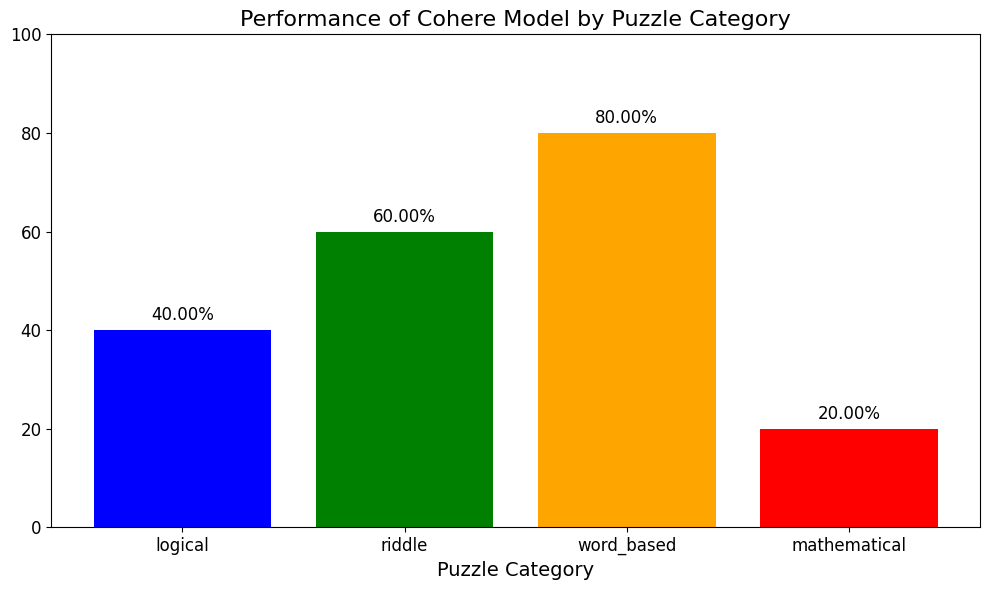

<Figure size 640x480 with 0 Axes>

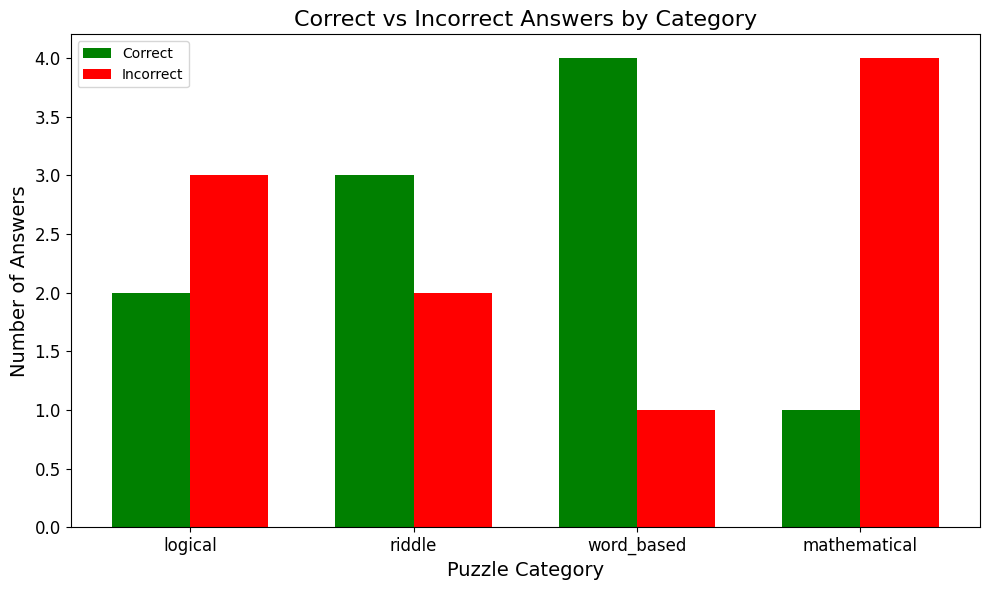

In [12]:
import time
import re
import cohere
import matplotlib.pyplot as plt

# Initialize Cohere client with your API key
API_KEY = "IPTHR0LKXbejJJJZ6uF9jfS3EM9QOlWgz5x5bwQt"  # Replace with your actual API key
co = cohere.Client(API_KEY)

brain_teasers = {
    "logical": {
        "A man is found hanging from a ceiling with water on the floor. What happened?": "He stood on an ice block, which melted.",
        "A man pushes his car to a hotel and tells the owner he's bankrupt. Why?": "Because he’s playing Monopoly.",
        "You see a boat filled with people. It has not sunk, but when you look again, you don’t see a single person. Why?": "All the people were married.",
        "A man dies of old age on his 25th birthday. How is this possible?": "He was born on February 29th.",
        "The more you take, the more you leave behind. What am I?": "Footsteps."
    },
    "riddle": {
        "What has keys but can't open locks?": "A piano or a A keyboard",
        "What has a heart that doesn't beat?": "The answer is an artichoke.",
        "What can travel around the world while staying in the same corner?": " A Stamp.",
        "The more of me you take, the more you leave behind. What am I?": "Footsteps.",
        "What begins with T, ends with T, and has T in it?": "A teapot."
    },
    "word_based": {
        "Rearrange the letters of 'stressed' to spell a word related to desserts.": "Desserts.",
        "What comes once in a minute, twice in a moment, but never in a thousand years?": "The letter M.",
        "What begins with T, ends with T, and has T in it?": "A teapot.",
        "What has to be broken before you can use it?": "An egg.",
        "The more you have of it, the less you see. What is it?": "Darkness."
    },
    "mathematical": {
        "What is 7 + 3 * 2?": " The answer is 13",
        "If it takes 6 men 6 hours to build 6 houses, how long will it take 2 men to build 2 houses?": "6 hours",
        "A car travels 60 miles per hour for 1 hour, then 40 miles per hour for 1 hour, then 20 miles per hour for 1 hour. What is the average speed for the entire trip?": "40 miles per hour.",
        "Solve this ((10*5))": "50",
        "What comes next in the sequence: 1, 3, 5, 7, ?, 11?": "9"
    }
}

# Function to clean up answers for comparison
def clean_answer(answer):
    words = re.findall(r'\w+', answer.lower())
    return words

# Function to call Cohere API (Zero-Shot)
def solve_brain_teaser_zero_shot(teaser):
    response = co.generate(
        model='command-xlarge-nightly',  # Using Cohere's large model
        prompt=teaser,                   # No examples, just the teaser as the prompt
        max_tokens=50,                   # Limit the answer length
        temperature=0.7                  # Adjust response creativity
    )
    return response.generations[0].text.strip()

# Function to evaluate the teasers
def evaluate_answers():
    correct_answers = 0
    wrong_answers = 0
    total_time = 0  # Total evaluation time
    category_results = {category: {"correct": 0, "wrong": 0, "total": len(teasers)} for category, teasers in brain_teasers.items()}

    print("\n******* Evaluation Summary: Cohere (Zero-Shot) *******")
    print("Model Name: Cohere\n")

    for category, teasers in brain_teasers.items():
        print(f"******* Category: {category.capitalize()} *******\n")
        for teaser, expected_answer in teasers.items():
            print(f"Teaser: {teaser}")

            # Start timer for this teaser
            start_time = time.time()

            # Solve teaser using the model (Zero-Shot)
            model_answer = solve_brain_teaser_zero_shot(teaser)

            # End timer for this teaser
            end_time = time.time()
            teaser_time = end_time - start_time
            total_time += teaser_time

            print(f"Model Answer: {model_answer}")
            print(f"Expected Answer: {expected_answer}")

            # Clean answers for comparison
            cleaned_model_answer = clean_answer(model_answer)
            cleaned_expected_answer = clean_answer(expected_answer)

            # Check if the answer is correct
            if cleaned_model_answer == cleaned_expected_answer:
                print("Result: Correct")
                correct_answers += 1
                category_results[category]["correct"] += 1
            else:
                print("Result: Incorrect")
                wrong_answers += 1
                category_results[category]["wrong"] += 1

            print(f"Time Taken: {teaser_time:.2f} seconds\n")

    # Summary
    total_teasers = sum(len(teasers) for teasers in brain_teasers.values())
    accuracy = (correct_answers / total_teasers) * 100
    error_rate = 100 - accuracy
    average_time = total_time / total_teasers

    print("\n******* Summary *******")
    print(f"Total Brain Teasers: {total_teasers}")
    print(f"Correct Answers: {correct_answers}")
    print(f"Wrong Answers: {wrong_answers}")
    print(f"Total Evaluation Time: {total_time:.2f} seconds")
    print(f"Average Time per Teaser: {average_time:.2f} seconds")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Error Rate: {error_rate:.2f}%")

    # Category-wise Results
    print("\n******* Category-Wise Results *******")
    for category, results in category_results.items():
        print(f"{category.capitalize()}:")
        print(f"  Correct: {results['correct']}")
        print(f"  Wrong: {results['wrong']}")
        print(f"  Total: {results['total']}\n")

    # Category-wise Breakdown
    print("Category-Wise Breakdown:")
    for category, results in category_results.items():
        category_accuracy = (results["correct"] / results["total"]) * 100
        print(f"  - {category.capitalize()} Puzzles: {category_accuracy:.2f}% accuracy")
        # Visualizing the performance with a bar graph
    categories = list(category_results.keys())
    accuracies = [
        (results["correct"] / results["total"]) * 100
        for results in category_results.values()
    ]

    # Plot the performance by category
    categories = list(category_results.keys())
    accuracies = [
        (results["correct"] / results["total"]) * 100
        for results in category_results.values()
    ]

    # Plot the accuracy bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(categories, accuracies, color=['blue', 'green', 'orange', 'red'])
    plt.title('Performance of Cohere Model by Puzzle Category', fontsize=16)
    plt.xlabel('Puzzle Category', fontsize=14)
    plt.ylim(0, 100)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Add accuracy labels on bars
    for i, accuracy in enumerate(accuracies):
        plt.text(i, accuracy + 2, f"{accuracy:.2f}%", ha='center', fontsize=12, color='black')

    plt.tight_layout()
    plt.show()

    # Add some space before the next chart
    plt.subplots_adjust(top=1.1)

    # Plot the correct vs incorrect answers bar chart
    correct_counts = [results["correct"] for results in category_results.values()]
    incorrect_counts = [results["wrong"] for results in category_results.values()]

    plt.figure(figsize=(10, 6))

    x = range(len(categories))
    width = 0.35

    plt.bar(x, correct_counts, width, label='Correct', color='green')
    plt.bar([p + width for p in x], incorrect_counts, width, label='Incorrect', color='red')

    plt.title('Correct vs Incorrect Answers by Category', fontsize=16)
    plt.xlabel('Puzzle Category', fontsize=14)
    plt.ylabel('Number of Answers', fontsize=14)
    plt.xticks([p + width / 2 for p in x], categories, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Run the evaluation
evaluate_answers()